

```
Cel: zastosowanie CNN dla CIFAR-10 oraz użycie GPU/TPU.
```



In [0]:
import tensorflow as tf
import os

import pandas as pd
import numpy as np
from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import to_categorical

np.random.seed(0)
%matplotlib inline

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [23]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

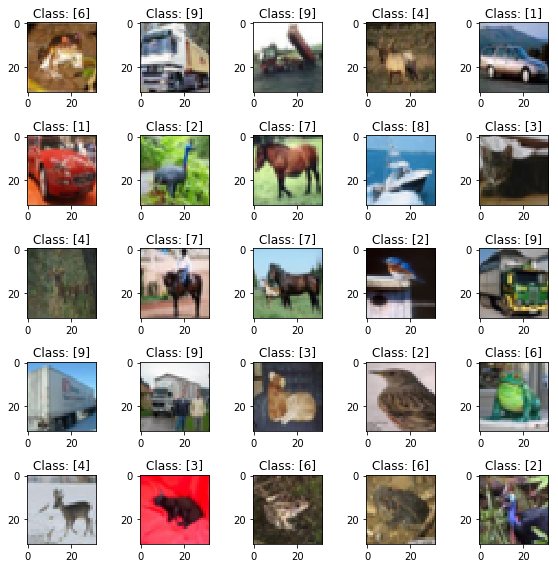

In [25]:
plt.figure(figsize=(8,8))
for idx in range(25):
    plt.subplot(5,5, idx+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title('Class: {}'.format(y_train[idx]))
#Odsunięcie osi od obrazków, tak by na siebie nie nachodziły
plt.tight_layout()

In [26]:
img_rows, img_cols = X_train.shape[1] , X_train.shape[2]

num_channels = 3

X_train= X_train.reshape(X_train.shape[0], img_rows,img_cols,num_channels)
X_test= X_test.reshape(X_test.shape[0], img_rows,img_cols,num_channels)

input_shape = (img_rows,img_cols,num_channels)
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
if np.max(X_train) > 2 : X_train = X_train /255
if np.max(X_test) > 2 : X_test = X_test /255

In [28]:
y_train.shape

(50000, 1)

In [0]:
if len(y_train.shape) == 2:
  y_train = y_train.reshape(-1)
  y_test = y_test.reshape(-1)
  
if len(y_train.shape) == 1:
  num_classess = len(set(y_train))
  y_train = to_categorical(y_train, num_classess)
  y_test = to_categorical(y_test, num_classess)

In [30]:
y_train.shape, y_train.shape, num_classess

((50000, 10), (50000, 10), 10)

In [31]:
os.environ['COLAB_TPU_ADDR']

'10.125.6.26:8470'

In [42]:
model = Sequential([
    Conv2D(filters =32, kernel_size=(3,3), activation='relu', input_shape= input_shape),
    Conv2D(filters =32, kernel_size=(3,3), activation='relu'),
    MaxPool2D (pool_size=(2,2)),
    Dropout (0.25),
    
    Conv2D(filters =64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters =64, kernel_size=(3,3), activation='relu'),
    MaxPool2D (pool_size=(2,2)),
    Dropout (0.25),
    
    Conv2D(filters =128, kernel_size=(3,3), activation='relu'),
    MaxPool2D (pool_size=(2,2)),
    Dropout (0.25),
    
    #Przejście z jednego rodzaju sieci do drugiej
    Flatten(),
    
    Dense(1024, activation = 'relu'),
    Dropout (0.5),
    Dense(num_classess, activation = 'softmax')
]
)

model.summary()
model.compile(loss  = 'categorical_crossentropy' , optimizer = 'adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)         

In [0]:
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

In [43]:
model.fit(
    X_train, y_train,
    batch_size=128 * 8,
    epochs = 20,
    validation_split = 0.2,
    validation_data =(X_test, y_test)
    
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 251us/sample - loss: 2.1456 - acc: 0.1810 - val_loss: 1.9841 - val_acc: 0.2634
Epoch 2/20
50000/50000 [==============================] - 12s 242us/sample - loss: 1.8610 - acc: 0.2904 - val_loss: 1.7565 - val_acc: 0.3405
Epoch 3/20
50000/50000 [==============================] - 12s 235us/sample - loss: 1.6887 - acc: 0.3650 - val_loss: 1.6366 - val_acc: 0.4053
Epoch 4/20
50000/50000 [==============================] - 12s 240us/sample - loss: 1.5570 - acc: 0.4211 - val_loss: 1.4797 - val_acc: 0.4455
Epoch 5/20
50000/50000 [==============================] - 12s 232us/sample - loss: 1.4590 - acc: 0.4642 - val_loss: 1.4219 - val_acc: 0.4846
Epoch 6/20
50000/50000 [==============================] - 12s 236us/sample - loss: 1.3955 - acc: 0.4918 - val_loss: 1.3236 - val_acc: 0.5241
Epoch 7/20
50000/50000 [==============================] - 12s 230us/sample - loss: 1.3434 - acc: 0.5114 

In [44]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 269us/sample - loss: 0.8904 - acc: 0.6933


[0.8904325795173645, 0.6933]